In [17]:
import string
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from patsy import dmatrices

from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [81]:
# Create Taylor Swift Dataframe
taylor_df = pd.read_csv('./taylor_swift_IP.csv')
taylor_df.columns = ['unnamed', 'sonnet_index', 'syllables', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
       'word_list', 'sonnet_num', 'author', 'polarity', 'subjectivity']

taylor_df['sonnet'] = taylor_df.apply(lambda x: 0, axis=1)

# unnecessary columns

taylor_df = taylor_df.drop('unnamed', axis=1)

taylor_df.head()

,sonnet_index,syllables,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,word_list,sonnet_num,author,polarity,subjectivity,sonnet
0,1,11,stress,stress,stress,stress,stress,unstress,stress,stress,stress,stress,unstress,missing,"['And', 'I', 'was', 'right', 'there', 'beside'...",1,taylor_swift,0.285714,0.535714,0
1,22,11,stress,stress,stress,stress,stress,stress,stress,stress,unstress,stress,unstress,missing,"['So', 'go', 'and', 'tell', 'your', 'friends',...",22,taylor_swift,0.000000,0.000000,0
2,26,11,stress,stress,stress,stress,unstress,stress,stress,unstress,stress,unstress,stress,missing,"['And', 'if', 'you', 'come', 'around', 'saying...",26,taylor_swift,-0.500000,1.000000,0
3,35,11,stress,stress,stress,stress,stress,stress,stress,stress,unstress,unstress,stress,missing,"['He', 'says', 'he', 'so', 'in', 'love', 'he',...",35,taylor_swift,0.250000,0.800000,0
4,46,11,stress,stress,stress,stress,unstress,stress,stress,stress,stress,stress,stress,missing,"['So', 'I', 'drive', 'home', 'alone', 'as', 'I...",46,taylor_swift,0.000000,0.000000,0


In [90]:
taylor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 20 columns):
sonnet_index    470 non-null int64
syllables       470 non-null int64
s1              470 non-null object
s2              470 non-null object
s3              470 non-null object
s4              470 non-null object
s5              470 non-null object
s6              470 non-null object
s7              470 non-null object
s8              470 non-null object
s9              470 non-null object
s10             470 non-null object
s11             470 non-null object
s12             470 non-null object
word_list       470 non-null object
sonnet_num      470 non-null int64
author          470 non-null object
polarity        470 non-null float64
subjectivity    470 non-null float64
sonnet          470 non-null int64
dtypes: float64(2), int64(4), object(14)
memory usage: 73.5+ KB


In [82]:
# Create BSB Dataframe
bsb_df = pd.read_csv('./bsb_IP.csv')
bsb_df.columns = ['unnamed', 'sonnet_index', 'syllables', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
       'word_list', 'sonnet_num', 'author', 'polarity', 'subjectivity']

bsb_df['sonnet'] = bsb_df.apply(lambda x: 0, axis=1)

# unnecessary columns

bsb_df = bsb_df.drop('unnamed', axis=1)

bsb_df.head()

,sonnet_index,syllables,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,word_list,sonnet_num,author,polarity,subjectivity,sonnet
0,1,11,stress,stress,stress,stress,unstress,stress,stress,unstress,stress,stress,stress,missing,"['Once', 'we', 'were', 'lovers', 'Just', 'love...",1,bsb,0.0,0.0,0
1,8,11,stress,stress,stress,stress,stress,stress,stress,stress,missing,stress,stress,missing,"['But', 'love', 'is', 'all', 'I', 'have', 'to'...",8,bsb,0.5,0.6,0
2,21,11,stress,stress,stress,stress,stress,stress,stress,stress,missing,stress,stress,missing,"['But', 'love', 'is', 'all', 'I', 'have', 'to'...",21,bsb,0.5,0.6,0
3,24,11,stress,missing,stress,stress,stress,stress,stress,stress,stress,stress,stress,missing,"['I', 'dont', 'know', 'what', 'he', 'does', 't...",24,bsb,0.0,0.0,0
4,43,11,stress,stress,stress,stress,stress,unstress,stress,stress,stress,stress,stress,missing,"['Hey', 'Yeah', 'yeah', 'I', 'wanna', 'know', ...",43,bsb,0.0,0.0,0


In [91]:
bsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 20 columns):
sonnet_index    349 non-null int64
syllables       349 non-null int64
s1              349 non-null object
s2              349 non-null object
s3              349 non-null object
s4              349 non-null object
s5              349 non-null object
s6              349 non-null object
s7              349 non-null object
s8              349 non-null object
s9              349 non-null object
s10             349 non-null object
s11             349 non-null object
s12             349 non-null object
word_list       349 non-null object
sonnet_num      349 non-null int64
author          349 non-null object
polarity        349 non-null float64
subjectivity    349 non-null float64
sonnet          349 non-null int64
dtypes: float64(2), int64(4), object(14)
memory usage: 54.6+ KB


In [117]:
# Create full_sonnet Dataframe
poems_df = pd.read_csv('./full_sonnet_df.csv')
poems_df.head()
poems_df.columns = ['unnamed0','unnamed1', 'sonnet_index', 'syllables', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
       'word_list', 'sonnet_num', 'author', 'polarity', 'subjectivity','sonnet']

# drop unnecessary columns

poems_df = poems_df.drop('unnamed0', axis=1)
poems_df = poems_df.drop('unnamed1', axis=1)

poems_df.head()

,sonnet_index,syllables,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,word_list,sonnet_num,author,polarity,subjectivity,sonnet
0,2,10,unstress,stress,unstress,stress,unstress,stress,unstress,stress,unstress,stress,missing,missing,"['From', 'fairest', 'creatures', 'we', 'desire...",1,Shakespeare,0.00,0.00,1
1,3,11,unstress,stress,stress,stress,unstress,stress,stress,stress,unstress,stress,missing,missing,"['That', 'thereby', 'beauty', 'rose', 'might',...",1,Shakespeare,0.60,0.95,1
2,4,10,stress,stress,unstress,missing,missing,stress,stress,stress,unstress,stress,missing,missing,"['But', 'as', 'the', 'riper', 'should', 'by', ...",1,Shakespeare,0.00,0.00,1
3,5,10,unstress,stress,unstress,stress,stress,stress,unstress,stress,unstress,unstress,missing,missing,"['His', 'tender', 'heir', 'might', 'bear', 'hi...",1,Shakespeare,0.00,0.00,1
4,6,10,stress,stress,stress,unstress,unstress,stress,stress,stress,stress,stress,missing,missing,"['But', 'thou', 'contracted', 'to', 'thine', '...",1,Shakespeare,0.65,0.90,1


In [118]:
# Randomly take subset of the full sonnets data
poems_df = poems_df.drop(poems_df.sample(frac=.65).index)

In [119]:
poems_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 0 to 5118
Data columns (total 20 columns):
sonnet_index    1792 non-null int64
syllables       1792 non-null int64
s1              1792 non-null object
s2              1792 non-null object
s3              1792 non-null object
s4              1792 non-null object
s5              1792 non-null object
s6              1792 non-null object
s7              1792 non-null object
s8              1792 non-null object
s9              1792 non-null object
s10             1792 non-null object
s11             1792 non-null object
s12             1792 non-null object
word_list       1792 non-null object
sonnet_num      1792 non-null int64
author          1765 non-null object
polarity        1792 non-null float64
subjectivity    1792 non-null float64
sonnet          1792 non-null int64
dtypes: float64(2), int64(4), object(14)
memory usage: 294.0+ KB


In [120]:
# Stacking the Taylor Swift, BSB, and Poems dataframes

final_df = pd.concat([taylor_df, bsb_df, poems_df])
final_df.head()
final_df.to_csv('final_df.csv')

In [121]:
final_df.shape

(2611, 20)

# Baseline

In [96]:
print(np.mean(final_df.sonnet))

0.8620747726507242


# Logistic Regression

In [97]:
logreg = LogisticRegression()

formula = 'sonnet ~ syllables + C(s1) + C(s2) + C(s3) + C(s4) + C(s5) + C(s6) + C(s7) + C(s8) + C(s9) + C(s10) + C(s11) + C(s12) + polarity + subjectivity -1'
Y, X = patsy.dmatrices(formula, data=final_df)

In [98]:
interaction_formula = ''' sonnet ~ syllables + (C(s1) + C(s2) + C(s3) + C(s4) + C(s5) + C(s6) + C(s7) + C(s8) + 
C(s9) + C(s10) + C(s11) + C(s12))**2 + polarity + subjectivity -1'''
Yint, Xint = patsy.dmatrices(interaction_formula, data=final_df, return_type='dataframe')
Xint = (Xint - Xint.mean()) / Xint.std()
Xint.dropna(axis=1, inplace=True)

In [99]:
Yint.shape, Xint.shape

((5938, 1), (5938, 290))

In [100]:
Y.shape, X.shape

((5938, 1), (5938, 28))

In [101]:
np.mean(Y)

array(0.86207477)

In [102]:
scores = cross_val_score(logreg, X, np.ravel(Y), cv=5)
print(scores)
print(np.mean(scores))

[0.96717172 0.97222222 0.97390572 0.96464646 0.97639123]
0.9708674717949591


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [103]:
scores = cross_val_score(logreg, Xint.values, np.ravel(Yint), cv=5)
print(scores)
print(np.mean(scores))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.96380471 0.97138047 0.97895623 0.96043771 0.97217538]
0.9693509008011537


In [122]:
# from sklearn.linear_model import ElasticNet
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.grid_search import GridSearchCV

# lr_params = {
#     'penalty':['l1','l2'],
#     'solver':['liblinear'],
#     'C':np.logspace(-5,1,25)
# }

# gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

# gs.fit(Xint.values, Yint.values.ravel())

# print(gs.best_score_)
# print(gs.best_params_)
# best_dtc = gs.best_estimator_

In [109]:
logreg.fit(X,np.ravel(Y))
pp = logreg.predict_proba(X)
y_pred_50pct = logreg.predict(X)

model_features = ['syllables', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 'polarity', 'subjectivity']

# zip(model_features, logreg.coef_)

len(model_features), len(logreg.coef_[0])
len(X.design_info.column_names), len(logreg.coef_[0])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(28, 28)

# Example

In [ ]:

#     # you have:
#     already_fit_model
    
#     def conversion_function(new_line):
#         # outputs 2d Xtest matrix with the new_line data converted to
#         # the same format patsy outputs for the X matrix above
#         # ONLY DO FOR NON-INTERACTION MODEL!
#         return Xtest
        
#     # now you have Xtest
#     # predicted if sonnet is 1 or zero
#     predicted_if_sonnet = already_fit_model.predict(Xtest)
    
#     # if you want confidence in the prediction:
#     predprob_if_sonnet = already_fit_model.predict_proba(Xtest)
    
#     # predicted probability is a 2 column matrix where the first
#     # column is probability that it is not a sonnet, 2nd
#     # column is probability that it is a sonnet


# Coefficients

In [166]:
d = {'variables': X.design_info.column_names, 'coefficients': logreg.coef_[0].tolist()}
coef_df = pd.DataFrame(data=d)

coef_df = coef_df.sort_values(by=['coefficients'])
coef_df.head(5)

,variables,coefficients
21,C(s11)[T.stress],-5.965099
22,C(s11)[T.unstress],-4.496732
9,C(s5)[T.stress],-1.703255
19,C(s10)[T.stress],-1.367713
8,C(s4)[T.unstress],-1.201015


In [167]:
turn_df = coef_df.T
turn_df.columns = [x for x in coef_df['variables']]
graph_col = list(turn_df.columns)
turn_df = turn_df.ix[1:]
turn_df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,C(s11)[T.stress],C(s11)[T.unstress],C(s5)[T.stress],C(s10)[T.stress],C(s4)[T.unstress],C(s8)[T.stress],C(s3)[T.stress],C(s2)[T.stress],C(s7)[T.stress],C(s6)[T.stress],...,C(s1)[missing],C(s9)[T.unstress],polarity,syllables,C(s7)[T.unstress],subjectivity,C(s12)[T.unstress],C(s3)[T.unstress],C(s12)[T.stress],C(s1)[unstress]
coefficients,-5.9651,-4.49673,-1.70325,-1.36771,-1.20102,-1.04182,-1.01996,-0.94168,-0.842589,-0.839274,...,0.20814,0.404196,0.42752,0.661847,0.834026,0.918416,1.22073,1.32338,1.6278,3.1029


# ROC curve

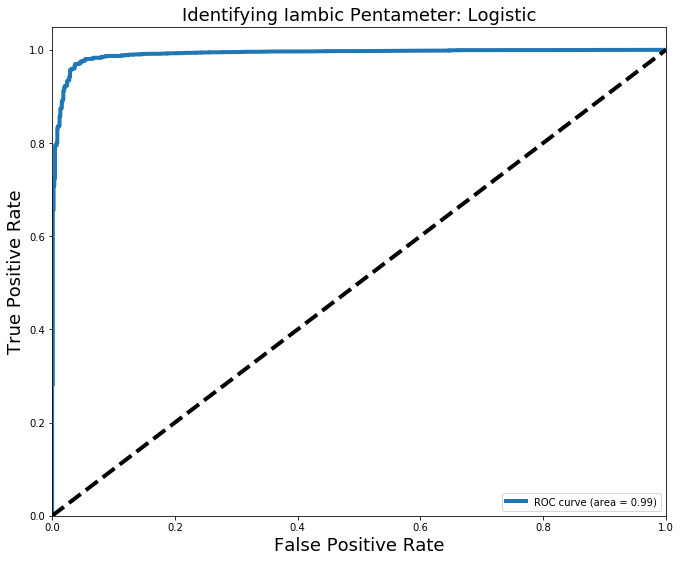

In [170]:
Ytrue = pd.Series(np.ravel(Y))
Y_score = logreg.decision_function(X)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Ytrue, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Identifying Iambic Pentameter: Logistic', fontsize=18)
plt.legend(loc="lower right")
plt.show()